In [1]:
''' 
!python3.7 -m pip install --upgrade pip
!pip install torch==1.7.0
!pip install torchvision 
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp37-cp37m-linux_x86_64.whl

'''

' \n!python3.7 -m pip install --upgrade pip\n!pip install torch==1.7.0\n!pip install torchvision \n!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp37-cp37m-linux_x86_64.whl\n\n'

# install latest version of torch xla nightly

In [2]:
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version "nightly"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5116  100  5116    0     0  22737      0 --:--:-- --:--:-- --:--:-- 22737
Updating... This may take around 2 minutes.
Updating TPU runtime to pytorch-nightly ...
Found existing installation: torch 1.5.0
Uninstalling torch-1.5.0:
  Successfully uninstalled torch-1.5.0
Found existing installation: torchvision 0.6.0a0+35d732a
Uninstalling torchvision-0.6.0a0+35d732a:
Done updating TPU runtime
  Successfully uninstalled torchvision-0.6.0a0+35d732a
Copying gs://tpu-pytorch/wheels/torch-nightly-cp37-cp37m-linux_x86_64.whl...
/ [1 files][123.1 MiB/123.1 MiB]                                                
Operation completed over 1 objects/123.1 MiB.                                    
Copying gs://tpu-pytorch/wheels/torch_xla-nightly-cp37-cp37m-linux_x86_64.whl...
/ [1 files][132.0 MiB/132.0 MiB]                                    

# Installing Gradual Warmup Scheduler

In [3]:
!pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git

  Cloning https://github.com/ildoonet/pytorch-gradual-warmup-lr.git to /tmp/pip-req-build-ayoi9e0t
  Running command git clone -q https://github.com/ildoonet/pytorch-gradual-warmup-lr.git /tmp/pip-req-build-ayoi9e0t
  Created wheel for warmup-scheduler: filename=warmup_scheduler-0.3.2-py3-none-any.whl size=3881 sha256=689108b1c2b11dcf1efe2b63de300743809dc28ec6d5a9a50976a1d75d882a77
  Stored in directory: /tmp/pip-ephem-wheel-cache-ohcjnqu9/wheels/bf/81/52/0e3bc0b645a339f94c76b4dcb8c8b7a5f588a614f5add83b9f
Successfully built warmup-scheduler
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Imports

In [4]:
import os

import torch_xla
import torch_xla.debug.metrics as met
import torch_xla.distributed.data_parallel as dp
import torch_xla.distributed.parallel_loader as pl
import torch_xla.utils.utils as xu
import torch_xla.core.xla_model as xm
import torch_xla.utils.serialization as xser
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.test.test_utils as test_utils

import sys; 

package_paths = [
    '../input/pytorch-image-models/pytorch-image-models-master', #'../input/efficientnet-pytorch-07/efficientnet_pytorch-0.7.0'
    '../input/image-fmix/FMix-master'
]
for pth in package_paths:
    sys.path.append(pth)
    

import torch

import warnings

import pandas as pd
import numpy as np
import torch.nn as nn

from sklearn.model_selection import train_test_split

from sklearn import metrics
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import time
import torchvision
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm

from PIL import Image, ImageFile

import torch.optim as optim
from torchvision import transforms
from torch.optim import lr_scheduler



import gc

import random

import skimage.io

from PIL import Image
import scipy as sp

import sklearn.metrics
from sklearn.metrics import accuracy_score

from functools import partial

from torch.utils.data import DataLoader, Dataset
import torchvision.models as models

from albumentations import Compose, Normalize, HorizontalFlip, VerticalFlip

from albumentations import (
    HorizontalFlip, VerticalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine, RandomResizedCrop,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Normalize, Cutout, CoarseDropout, ShiftScaleRotate, CenterCrop, Resize
)

from albumentations.pytorch import ToTensorV2


from contextlib import contextmanager
from pathlib import Path
from collections import defaultdict, Counter



from fmix import sample_mask, make_low_freq_image, binarise_mask

from glob import glob
from sklearn.model_selection import GroupKFold, StratifiedKFold
import cv2
from skimage import io

from torch import nn

from datetime import datetime
import time
import random


from torchvision import transforms

from tqdm import tqdm

import matplotlib.pyplot as plt

from torch.utils.data.sampler import SequentialSampler, RandomSampler

from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F

import timm

import sklearn
import warnings
import joblib
from sklearn.metrics import roc_auc_score, log_loss
from sklearn import metrics


import pydicom

from scipy.ndimage.interpolation import zoom


import PIL.Image

import torch.nn.functional as F

from torch.utils.data.sampler import SubsetRandomSampler, RandomSampler, SequentialSampler
from warmup_scheduler import GradualWarmupScheduler

import albumentations

from sklearn.metrics import cohen_kappa_score
from tqdm import tqdm_notebook as tqdm
from pylab import rcParams

#from efficientnet_pytorch import EfficientNet

warnings.filterwarnings("ignore")

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


# version of torch

In [5]:
print(torch.__version__)

1.8.0a0+2c3c2a4


# For parallelization in TPUs

In [6]:
os.environ["XLA_USE_BF16"] = "1"
os.environ["XLA_TENSOR_ALLOCATOR_MAXSIZE"] = "100000000"

# Config

In [7]:
DEBUG = 0

data_dir = '../input/cassava-leaf-disease-classification'
df_train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
image_folder = os.path.join(data_dir, 'train_images')

kernel_type = 'vit_base_resnet50d_224' 

net_type = 'vit_base_resnet50d_224'
folds = 5
#fold = 0
image_size = 224
batch_size = 4
num_workers = 4
out_dim = 5
init_lr = 1e-4
warmup_factor = 7
warmup_epo = 1

smoothing = 0.05
t1 = 0.8
t2 = 1.4
freeze=True
epoch_threshold = 5

n_epochs = 1 if DEBUG else 10
df_train = df_train.sample(500).reset_index(drop=True) if DEBUG else df_train

#device = torch.device('cuda')

print(image_folder)

../input/cassava-leaf-disease-classification/train_images


# Create Folds

we will use StratifiedKFold

In [8]:
skf = StratifiedKFold(folds, shuffle=True, random_state=42)
df_train['fold'] = -1
for i, (train_idx, valid_idx) in enumerate(skf.split(df_train, df_train['label'])):
    df_train.loc[valid_idx, 'fold'] = i
df_train.head()

,image_id,label,fold
0,1000015157.jpg,0,3
1,1000201771.jpg,3,2
2,100042118.jpg,1,2
3,1000723321.jpg,1,1
4,1000812911.jpg,3,2


# Dataset

Custom dataset class that will process our dataset,it returns images and corresponding labels as torch tensor.

In [9]:

class LEAFDataset(Dataset):
    def __init__(self, df, transforms=None):

        self.df = df.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        row = self.df.iloc[index]
        img_id = row.image_id
        
        image_file = os.path.join(image_folder, img_id)
        image = cv2.imread(image_file)
        image = image[:, :, ::-1]

        if self.transforms is not None:
            image = self.transforms(image=image)['image']
        image = image.astype(np.float32)
        image /= 255
        image = image.transpose(2, 0, 1)

        return torch.tensor(image), torch.tensor(row.label)


# Augmentations

horizontal flip and resize for training and only resize for validation

In [11]:
transforms_train = albumentations.Compose([
    albumentations.HorizontalFlip(p=0.5),
    
    albumentations.Resize(image_size, image_size),
    
    albumentations.Transpose(p=0.5),
    albumentations.VerticalFlip(p=0.5),
    #albumentations.augmentations.transforms.ColorJitter(brightness=0.10, contrast=0.2, saturation=0.2, hue=0.00, always_apply=False, p=0.5),
    albumentations.ShiftScaleRotate(p=0.5),
    albumentations.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
    albumentations.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
    #albumentations.augmentations.transforms.RGBShift (r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5),
    #albumentations.augmentations.transforms.ChannelDropout (channel_drop_range=(1, 1), fill_value=0, always_apply=False, p=0.5),
    
    #albumentations.augmentations.transforms.GridDistortion (num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
    albumentations.CoarseDropout(p=0.5),
    albumentations.Cutout(p=0.5),
    #albumentations.Normalize(mean=[0.4303, 0.4967, 0.3134], std=[0.2142, 0.2191, 0.1954], max_pixel_value=255.0, p=1.0),

])
transforms_val = albumentations.Compose([
    
    albumentations.Resize(image_size, image_size),
    #albumentations.HorizontalFlip(p=0.5),
    #albumentations.VerticalFlip(p=0.5),
    #albumentations.Normalize(mean=[0.4303, 0.4967, 0.3134], std=[0.2142, 0.2191, 0.1954], max_pixel_value=255.0, p=1.0),
])

# Visualizing dataset

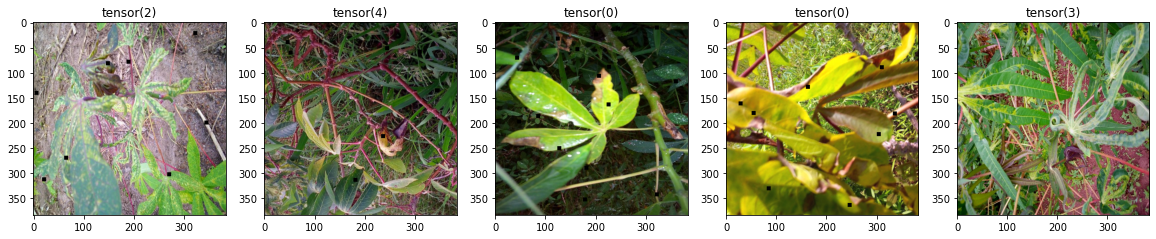

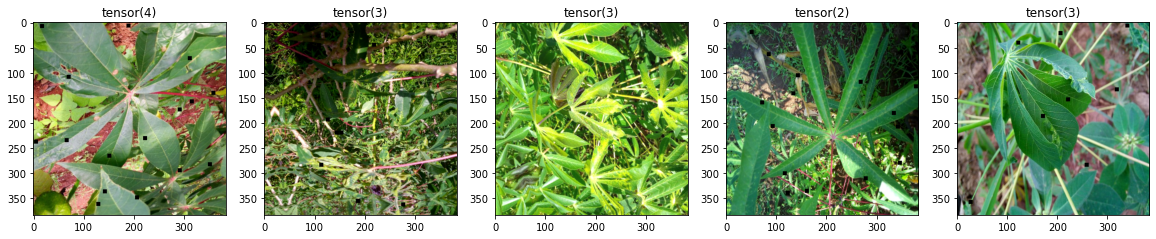

In [12]:
dataset_show = LEAFDataset(df_train, transforms=transforms_train)
rcParams['figure.figsize'] = 20,10
for i in range(2):
    f, axarr = plt.subplots(1,5)
    for p in range(5):
        idx = np.random.randint(0, len(dataset_show))
        img, label = dataset_show[idx]
        axarr[p].imshow(img.transpose(0, 1).transpose(1,2).squeeze())
        axarr[p].set_title(str(label))

# Model

In [13]:
class cassavamodel(nn.Module):
    def __init__(self, model_arch, n_class, pretrained=True):
        super().__init__()
        self.model = timm.create_model(model_arch, pretrained=pretrained)
        #print(self.model)
        n_features = self.model.head.in_features
        self.model.head = nn.Linear(n_features, n_class)

    def forward(self, x):
        x = self.model(x)
        return x
    

In [14]:
''' 
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

model = EfficientNet.from_name('efficientnet-b2')

#model.avg_pool = nn.AdaptiveAvgPool2d(1)
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs, out_dim)
'''

" \n!pip install efficientnet_pytorch\nfrom efficientnet_pytorch import EfficientNet\n\nmodel = EfficientNet.from_name('efficientnet-b2')\n\n#model.avg_pool = nn.AdaptiveAvgPool2d(1)\nnum_ftrs = model._fc.in_features\nmodel._fc = nn.Linear(num_ftrs, out_dim)\n"

# Loss Function

In [15]:
# Code taken from https://github.com/fhopfmueller/bi-tempered-loss-pytorch/blob/master/bi_tempered_loss_pytorch.py

def log_t(u, t):
    """Compute log_t for `u'."""
    if t==1.0:
        return u.log()
    else:
        return (u.pow(1.0 - t) - 1.0) / (1.0 - t)

def exp_t(u, t):
    """Compute exp_t for `u'."""
    if t==1:
        return u.exp()
    else:
        return (1.0 + (1.0-t)*u).relu().pow(1.0 / (1.0 - t))

def compute_normalization_fixed_point(activations, t, num_iters):

    """Returns the normalization value for each example (t > 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same shape as activation with the last dimension being 1.
    """
    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations_step_0 = activations - mu

    normalized_activations = normalized_activations_step_0

    for _ in range(num_iters):
        logt_partition = torch.sum(
                exp_t(normalized_activations, t), -1, keepdim=True)
        normalized_activations = normalized_activations_step_0 * \
                logt_partition.pow(1.0-t)

    logt_partition = torch.sum(
            exp_t(normalized_activations, t), -1, keepdim=True)
    normalization_constants = - log_t(1.0 / logt_partition, t) + mu

    return normalization_constants

def compute_normalization_binary_search(activations, t, num_iters):

    """Returns the normalization value for each example (t < 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (< 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """

    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations = activations - mu

    effective_dim = \
        torch.sum(
                (normalized_activations > -1.0 / (1.0-t)).to(torch.int32),
            dim=-1, keepdim=True).to(activations.dtype)

    shape_partition = activations.shape[:-1] + (1,)
    lower = torch.zeros(shape_partition, dtype=activations.dtype, device=activations.device)
    upper = -log_t(1.0/effective_dim, t) * torch.ones_like(lower)

    for _ in range(num_iters):
        logt_partition = (upper + lower)/2.0
        sum_probs = torch.sum(
                exp_t(normalized_activations - logt_partition, t),
                dim=-1, keepdim=True)
        update = (sum_probs < 1.0).to(activations.dtype)
        lower = torch.reshape(
                lower * update + (1.0-update) * logt_partition,
                shape_partition)
        upper = torch.reshape(
                upper * (1.0 - update) + update * logt_partition,
                shape_partition)

    logt_partition = (upper + lower)/2.0
    return logt_partition + mu

class ComputeNormalization(torch.autograd.Function):
    """
    Class implementing custom backward pass for compute_normalization. See compute_normalization.
    """
    @staticmethod
    def forward(ctx, activations, t, num_iters):
        if t < 1.0:
            normalization_constants = compute_normalization_binary_search(activations, t, num_iters)
        else:
            normalization_constants = compute_normalization_fixed_point(activations, t, num_iters)

        ctx.save_for_backward(activations, normalization_constants)
        ctx.t=t
        return normalization_constants

    @staticmethod
    def backward(ctx, grad_output):
        activations, normalization_constants = ctx.saved_tensors
        t = ctx.t
        normalized_activations = activations - normalization_constants 
        probabilities = exp_t(normalized_activations, t)
        escorts = probabilities.pow(t)
        escorts = escorts / escorts.sum(dim=-1, keepdim=True)
        grad_input = escorts * grad_output
        
        return grad_input, None, None

def compute_normalization(activations, t, num_iters=5):
    """Returns the normalization value for each example. 
    Backward pass is implemented.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """
    return ComputeNormalization.apply(activations, t, num_iters)

def tempered_sigmoid(activations, t, num_iters = 5):
    """Tempered sigmoid function.
    Args:
      activations: Activations for the positive class for binary classification.
      t: Temperature tensor > 0.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_probabilities = tempered_softmax(internal_activations, t, num_iters)
    return internal_probabilities[..., 0]


def tempered_softmax(activations, t, num_iters=5):
    """Tempered softmax function.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature > 1.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    if t == 1.0:
        return activations.softmax(dim=-1)

    normalization_constants = compute_normalization(activations, t, num_iters)
    return exp_t(activations - normalization_constants, t)

def bi_tempered_binary_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing = 0.0,
        num_iters=5,
        reduction='mean'):

    """Bi-Tempered binary logistic loss.
    Args:
      activations: A tensor containing activations for class 1.
      labels: A tensor with shape as activations, containing probabilities for class 1
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing
      num_iters: Number of iterations to run the method.
    Returns:
      A loss tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_labels = torch.stack([labels.to(activations.dtype),
        1.0 - labels.to(activations.dtype)],
        dim=-1)
    return bi_tempered_logistic_loss(internal_activations, 
            internal_labels,
            t1,
            t2,
            label_smoothing = label_smoothing,
            num_iters = num_iters,
            reduction = reduction)

def bi_tempered_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing=0.0,
        num_iters=5,
        reduction = 'mean'):

    """Bi-Tempered Logistic Loss.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      labels: A tensor with shape and dtype as activations (onehot), 
        or a long tensor of one dimension less than activations (pytorch standard)
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing parameter between [0, 1). Default 0.0.
      num_iters: Number of iterations to run the method. Default 5.
      reduction: ``'none'`` | ``'mean'`` | ``'sum'``. Default ``'mean'``.
        ``'none'``: No reduction is applied, return shape is shape of
        activations without the last dimension.
        ``'mean'``: Loss is averaged over minibatch. Return shape (1,)
        ``'sum'``: Loss is summed over minibatch. Return shape (1,)
    Returns:
      A loss tensor.
    """

    if len(labels.shape)<len(activations.shape): #not one-hot
        labels_onehot = torch.zeros_like(activations)
        labels_onehot.scatter_(1, labels[..., None], 1)
    else:
        labels_onehot = labels

    if label_smoothing > 0:
        num_classes = labels_onehot.shape[-1]
        labels_onehot = ( 1 - label_smoothing * num_classes / (num_classes - 1) ) \
                * labels_onehot + \
                label_smoothing / (num_classes - 1)

    probabilities = tempered_softmax(activations, t2, num_iters)

    loss_values = labels_onehot * log_t(labels_onehot + 1e-10, t1) \
            - labels_onehot * log_t(probabilities, t1) \
            - labels_onehot.pow(2.0 - t1) / (2.0 - t1) \
            + probabilities.pow(2.0 - t1) / (2.0 - t1)
    loss_values = loss_values.sum(dim = -1) #sum over classes

    if reduction == 'none':
        return loss_values
    if reduction == 'sum':
        return loss_values.sum()
    if reduction == 'mean':
        return loss_values.mean()

In [ ]:


# implementations reference - https://github.com/CoinCheung/pytorch-loss/blob/master/pytorch_loss/taylor_softmax.py
# paper - https://www.ijcai.org/Proceedings/2020/0305.pdf

class TaylorSoftmax(nn.Module):

    def __init__(self, dim=1, n=2):
        super(TaylorSoftmax, self).__init__()
        assert n % 2 == 0
        self.dim = dim
        self.n = n

    def forward(self, x):
        
        fn = torch.ones_like(x)
        denor = 1.
        for i in range(1, self.n+1):
            denor *= i
            fn = fn + x.pow(i) / denor
        out = fn / fn.sum(dim=self.dim, keepdims=True)
        return out

class LabelSmoothingLoss(nn.Module):

    def __init__(self, classes, smoothing=0.0, dim=-1): 
        super(LabelSmoothingLoss, self).__init__() 
        self.confidence = 1.0 - smoothing 
        self.smoothing = smoothing 
        self.cls = classes 
        self.dim = dim 
    def forward(self, pred, target): 
        """Taylor Softmax and log are already applied on the logits"""
        #pred = pred.log_softmax(dim=self.dim) 
        with torch.no_grad(): 
            true_dist = torch.zeros_like(pred) 
            true_dist.fill_(self.smoothing / (self.cls - 1)) 
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence) 
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))
    

class TaylorCrossEntropyLoss(nn.Module):

    def __init__(self, n=2, ignore_index=-1, reduction='mean', smoothing=0.2):
        super(TaylorCrossEntropyLoss, self).__init__()
        assert n % 2 == 0
        self.taylor_softmax = TaylorSoftmax(dim=1, n=n)
        self.reduction = reduction
        self.ignore_index = ignore_index
        self.lab_smooth = LabelSmoothingLoss(out_dim, smoothing=smoothing)

    def forward(self, logits, labels):

        log_probs = self.taylor_softmax(logits).log()
        #loss = F.nll_loss(log_probs, labels, reduction=self.reduction,
        #        ignore_index=self.ignore_index)
        loss = self.lab_smooth(log_probs, labels)
        return loss



In [17]:
criterion = TaylorCrossEntropyLoss(n=2, smoothing = smoothing )

# Train and eval function

In [18]:
def train_epoch(model,device,loader, optimizer):
 
    model.train()
    train_loss = []
    bar = tqdm(loader)
    for (data, target) in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        logits = model(data)
        #loss = criterion(logits, target)
        loss = bi_tempered_logistic_loss(logits, target, t1=t1, t2=t2, label_smoothing=smoothing)
            
        loss.backward()
        xm.optimizer_step(optimizer)
        loss_np = loss.detach().cpu().numpy()
        train_loss.append(loss_np)
        #bar.set_description('loss: %.5f' % (loss_np))
    return train_loss

def val_epoch(model,device,loader, get_output=False):
    model.eval()

    t = time.time()

    val_loss = []
    sample_num = 0
    image_preds_all = []
    image_targets_all = []

    pbar = tqdm(enumerate(loader), total=len(loader))
    for step, (imgs, image_labels) in pbar:
        imgs = imgs.to(device).float()
        image_labels = image_labels.to(device).long()
        
        image_preds = model(imgs)   #output = model(input)
        image_preds_all += [torch.argmax(image_preds, 1).detach().cpu().numpy()]
        image_targets_all += [image_labels.detach().cpu().numpy()]
        
        #loss = criterion(image_preds, image_labels)
        loss = bi_tempered_logistic_loss(image_preds, image_labels, t1=t1, t2=t2, label_smoothing = smoothing)
           
        val_loss.append(loss.detach().cpu().numpy())
        
        sample_num += image_labels.shape[0]  

       
    val_loss = np.mean(val_loss)
    image_preds_all = np.concatenate(image_preds_all)
    image_targets_all = np.concatenate(image_targets_all)
    acc = (image_preds_all==image_targets_all).mean()

    accuracy = xm.mesh_reduce('test_accuracy', acc, np.mean)
    xm.master_print("Validation Accuracy = ",accuracy)

    return val_loss,accuracy
    


# Cassava Model

In [19]:
model = cassavamodel(net_type, n_class=out_dim)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-vitjx/jx_vit_large_p32_384-9b920ba8.pth" to /root/.cache/torch/hub/checkpoints/jx_vit_large_p32_384-9b920ba8.pth


# Scheduler

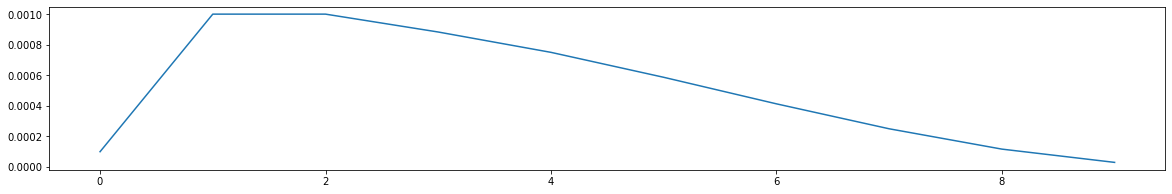

In [20]:

class GradualWarmupSchedulerV2(GradualWarmupScheduler):
    def __init__(self, optimizer, multiplier, total_epoch, after_scheduler=None):
        super(GradualWarmupSchedulerV2, self).__init__(optimizer, multiplier, total_epoch, after_scheduler)
    def get_lr(self):
        if self.last_epoch > self.total_epoch:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]
        if self.multiplier == 1.0:
            return [base_lr * (float(self.last_epoch) / self.total_epoch) for base_lr in self.base_lrs]
        else:
            return [base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.) for base_lr in self.base_lrs]


init_lr = init_lr * xm.xrt_world_size()

optimizer = optim.Adam(model.parameters(), lr=init_lr)
scheduler_cosine = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, n_epochs-warmup_epo)
scheduler_warmup = GradualWarmupSchedulerV2(optimizer, multiplier=10, total_epoch=warmup_epo, after_scheduler=scheduler_cosine)



lrs = []
for epoch in range(1, n_epochs+1):
    scheduler_warmup.step(epoch-1)
    lrs.append(optimizer.param_groups[0]["lr"])
rcParams['figure.figsize'] = 20,3
plt.plot(lrs)

# Layer freezing in transfer learning

In [21]:
#model = cassavamodel(net_type, n_class=out_dim)

def train_model():
    device = xm.xla_device()
    #global model
    #model = xm.send_cpu_data_to_device(model, device)
    model.to(device)
    for fold in range(folds):
        if(fold != 3):
            continue

        optimizer = optim.Adam(model.parameters(), lr=init_lr/warmup_factor)
        scheduler_cosine = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, n_epochs-warmup_epo)
        scheduler = GradualWarmupScheduler(optimizer, multiplier=warmup_factor, total_epoch=warmup_epo, after_scheduler=scheduler_cosine)

        train_idx = np.where((df_train['fold'] != fold))[0]
        valid_idx = np.where((df_train['fold'] == fold))[0]
   
        df_this  = df_train.loc[train_idx]
        df_valid = df_train.loc[valid_idx]

        dataset_train = LEAFDataset(df_this , transforms=transforms_train)
        dataset_valid = LEAFDataset(df_valid, transforms=transforms_val)

        train_sampler = torch.utils.data.distributed.DistributedSampler(
            dataset_train,
            num_replicas=xm.xrt_world_size(),
            rank=xm.get_ordinal(),
            shuffle=True)


        valid_sampler = torch.utils.data.distributed.DistributedSampler(
            dataset_valid,
            num_replicas=xm.xrt_world_size(),
            rank=xm.get_ordinal(),
            shuffle=False,
            )


        train_loader = torch.utils.data.DataLoader(
            dataset=dataset_train,
            batch_size=batch_size,
            sampler=train_sampler,
            drop_last=True,
            num_workers=num_workers,
        )

        valid_loader = torch.utils.data.DataLoader(
            dataset=dataset_valid, 
            batch_size=batch_size,
            sampler=valid_sampler,
            drop_last=True,
            num_workers=num_workers,
        )

        acc_max = 0.
        
        for epoch in range(1, n_epochs+1):
             
 
            count = 0
            if epoch < 4:
                # freeze backbone layers
                for param in model.children():
                    count +=1
                    if count < 4: #freezing first 3 layers
                        param.requires_grad = False

            else:
                scheduler.step(epoch-1)
                for param in model.children():
                    param.requires_grad = True
            

            para_loader = pl.ParallelLoader(train_loader, [device])

            train_loss = train_epoch(model,device,para_loader.per_device_loader(device), optimizer)
            del para_loader
            gc.collect()
        
            para_loader = pl.ParallelLoader(valid_loader, [device])

            val_loss, acc = val_epoch(model,device,para_loader.per_device_loader(device))
            
            del para_loader
            gc.collect()
            
            #xm.master_print(device)
         

            content = time.ctime() + ' ' + f'FOLD -> {fold} --> Epoch {epoch}, lr: {optimizer.param_groups[0]["lr"]:.7f}, train loss: {np.mean(train_loss):.5f}, val loss: {np.mean(val_loss):.5f}, acc: {(acc):.5f}'

            with open(f'log_{kernel_type}.txt', 'a') as appender:
                appender.write(content + '\n')
            

            #xm.save(model.state_dict(), os.path.join(f'{kernel_type}_fold{fold}_epoch_{epoch}_val_acc_{acc}.pth'))
        
            best_file = f'{kernel_type}_best_fold.pth'

            if acc > acc_max:
                xm.save(model.state_dict(), os.path.join(best_file))
                #xser.save(model.state_dict(), os.path.join(best_file))
                acc_max = acc
            
        #xm.save(model.state_dict(), os.path.join(f'{kernel_type}_fold{fold}.pth'))    



# Start training processes

In [ ]:
%%time

def _mp_fn(rank, flags):
    global acc_list
    torch.set_default_tensor_type('torch.FloatTensor')
    res = train_model()

FLAGS={}
xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=8, start_method='fork')

# Full Training Log

In [ ]:
f = open(f'./log_{kernel_type}.txt', "r")

print(f.read())